## Diversification Limits

- Diversification is efficient for eliminating unrewarded risks, particularly specific or idiosyncratic risks.
- However, diversification has limits, especially in severe bear market conditions.
- Systematic risks (impacting all assets simultaneously) cannot be diversified away.

## Hedging:

- Hedging is introduced as a strategy to deal with systematic risk.
- While effective in providing downside protection, hedging is symmetric, meaning it sacrifices upside potential.

## Insurence as Dynamic Hedging:

- Insurance is presented as a solution that combines downside protection with the opportunity for upside potential.
- Dynamic hedging in insurance involves adjusting risk-taking based on the margin for error.


In [24]:
# Limits of Diversification
%load_ext autoreload
%autoreload 2
import edhec_risk as erk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
ind_return = erk.get_ind_returns()
ind_size = erk.get_ind_size()
ind_nfirms = erk.get_ind_nfirms()
ind_return.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [26]:
# Computing Market Capitaliztion

ind_mktCap = ind_nfirms * ind_size
ind_mktCap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


In [27]:
# Calculating the total market capitalization over the time

total_mktCap = ind_mktCap.sum(axis='columns')
total_mktCap

1926-07       26657.94
1926-08       27436.34
1926-09       28060.41
1926-10       28057.23
1926-11       27198.40
              ...     
2018-08    29949911.36
2018-09    30990177.46
2018-10    30918505.63
2018-11    28463290.74
2018-12    28851651.12
Freq: M, Length: 1110, dtype: float64

<Axes: >

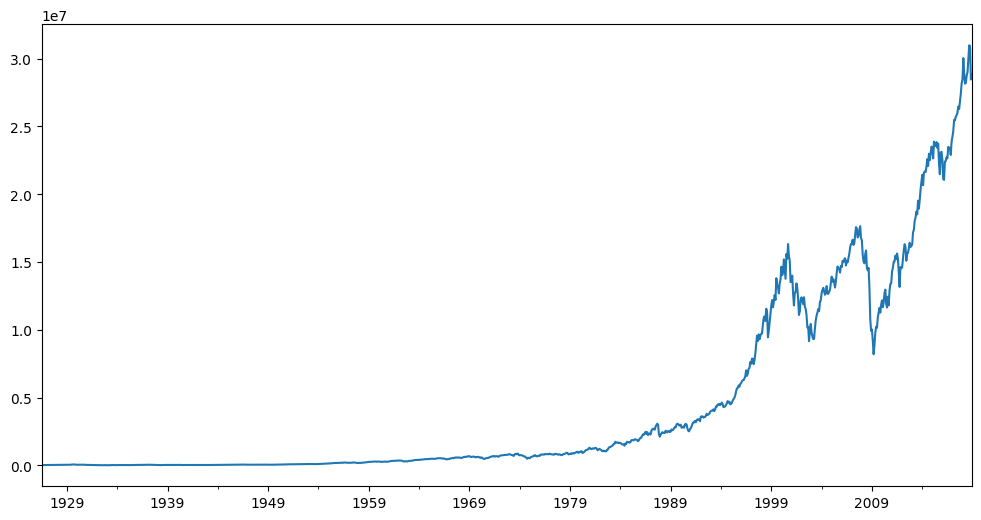

In [28]:
total_mktCap.plot(figsize=(12,6))

In [29]:
# Calculating how much each sector contributes to the Total Market Capitalization. Example: Food is 0.058037 which means
# it contribute to around 5 or 6% of the total market capitalization
ind_capWeight = ind_mktCap.divide(total_mktCap, axis="rows")
ind_capWeight

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,0.021873,0.008309,0.008222,0.011997,0.001168,0.014569,0.009720,0.103549,0.017596,0.000616,...,0.039896,0.161042,0.108402,0.010090,0.023453,0.010987,0.076225,0.014317,0.164637,0.047815
2018-09,0.021005,0.007873,0.007515,0.011923,0.001076,0.014427,0.009874,0.104324,0.016954,0.000618,...,0.039669,0.163597,0.114947,0.009675,0.023248,0.010992,0.080234,0.014275,0.162556,0.047549
2018-10,0.020661,0.007862,0.007831,0.011851,0.001052,0.014606,0.010000,0.106363,0.014954,0.000580,...,0.040434,0.163111,0.114711,0.009650,0.023535,0.010681,0.080886,0.014663,0.159464,0.048158
2018-11,0.022649,0.008403,0.009178,0.010810,0.001066,0.015702,0.009761,0.105080,0.014176,0.000467,...,0.043476,0.160187,0.114465,0.009333,0.023064,0.010674,0.078849,0.015642,0.161024,0.049159


<Axes: >

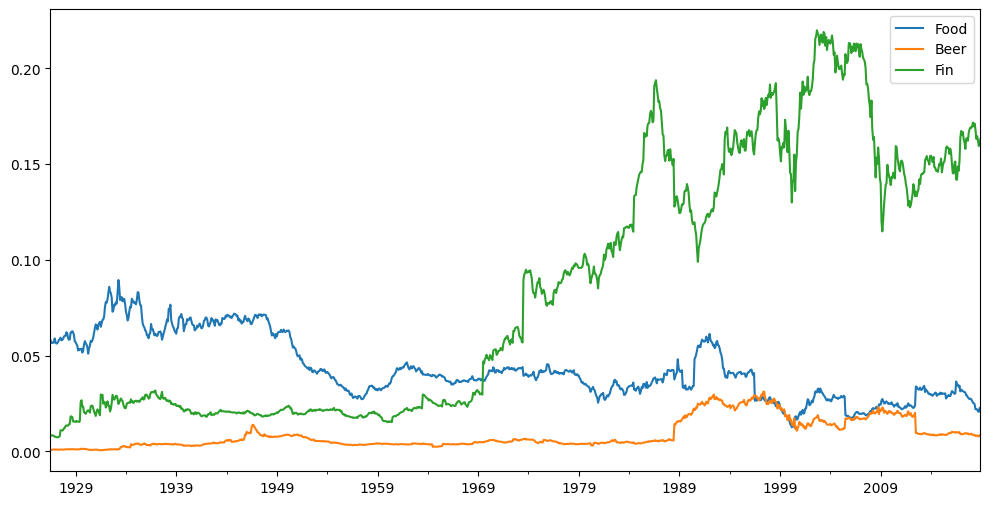

In [30]:
ind_capWeight[['Food', 'Beer', 'Fin']].plot(figsize=(12,6))

<Axes: >

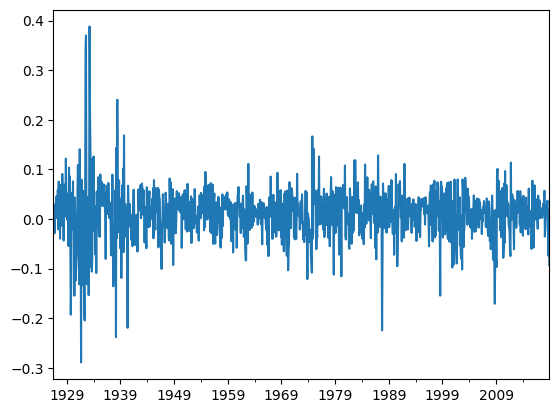

In [32]:
# Calculating the Total Market Returns for each period
total_market_return = (ind_capWeight * ind_return).sum(axis="columns")
total_market_return.plot()

<Axes: title={'center': 'Total Market CapWeighted Index 1926-2018'}>

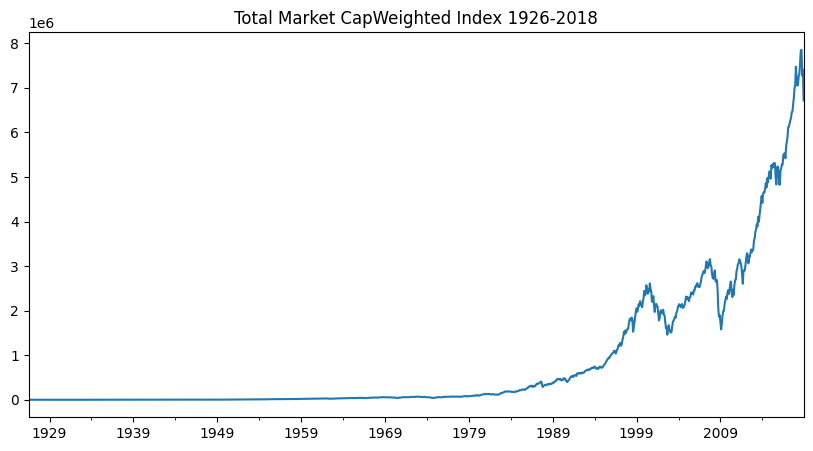

In [33]:

total_market_index = erk.drawdown(total_market_return).Wealth
total_market_index.plot(figsize=(10,5), title= "Total Market CapWeighted Index 1926-2018")